#### Imports...

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import warnings
warnings.filterwarnings("ignore")


In [34]:
df= pd.read_csv (r'../europe.csv')
df.head(3)

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.8,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.3,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.6,-0.80,9.6


In [46]:
#Estandarizo los datos
df_countries= df["Country"]
df_stand=  StandardScaler().fit_transform(df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]])
df_stand= pd.DataFrame(df_stand, columns=df[["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]].columns)
df_stand.head(3)

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973


### Variables

In [59]:
k = 4
n = 7
radius = 6
learning_rate = 0.9

In [60]:
#example
weights = [[i+j*k for i in range(k)] for j in range(k)]
#starts weights with values from 0 to k*k, like this:
#[[0, 1, 2],
# [3, 4, 5],
# [6, 7, 8]]

weights

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload 2


In [61]:
from utils import init_weights

w = init_weights(k,n) #random starting weights...
w

[[[-0.9502310579261237,
   0.3837254388152356,
   0.8294394269012506,
   0.49085628689553773,
   0,
   0,
   0],
  [0.306094110026635,
   -0.6779389503821465,
   -0.9716375107905479,
   0.7057745151699608,
   1,
   1,
   1],
  [-0.24622722749818382,
   -0.09249127426660908,
   -0.2713501271513812,
   -0.05026864777051898,
   2,
   2,
   2],
  [-0.7718420742936525,
   -0.042466851292776164,
   -0.9931858130782771,
   -0.05224077924546289,
   3,
   3,
   3]],
 [[0.04443319930360956,
   -0.734977449892841,
   0.3346282420127167,
   0.7794637458244187,
   4,
   4,
   4],
  [0.34631625534569443,
   0.21789144199742405,
   0.7491355140860092,
   0.544504569240827,
   5,
   5,
   5],
  [-0.48680374750906585,
   -0.7440822049949958,
   -0.24516459634683696,
   -0.33144305615297154,
   6,
   6,
   6],
  [-0.5206395221825793,
   0.4858015813779901,
   -0.9703020984453814,
   -0.19326372163755523,
   7,
   7,
   7]],
 [[0.1671207236234089,
   0.47343845102632387,
   0.1656595025199934,
   -0.7823

### `the loop`

[[[-0.9502310579261237, 0.3837254388152356, 0.8294394269012506, 0.49085628689553773, 0, 0, 0], [0.306094110026635, -0.6779389503821465, -0.9716375107905479, 0.7057745151699608, 1, 1, 1], [-0.24622722749818382, -0.09249127426660908, -0.2713501271513812, -0.05026864777051898, 2, 2, 2], [-0.7718420742936525, -0.042466851292776164, -0.9931858130782771, -0.05224077924546289, 3, 3, 3]], [[0.04443319930360956, -0.734977449892841, 0.3346282420127167, 0.7794637458244187, 4, 4, 4], [0.34631625534569443, 0.21789144199742405, 0.7491355140860092, 0.544504569240827, 5, 5, 5], [-0.48680374750906585, -0.7440822049949958, -0.24516459634683696, -0.33144305615297154, 6, 6, 6], [-0.5206395221825793, 0.4858015813779901, -0.9703020984453814, -0.19326372163755523, 7, 7, 7]], [[0.1671207236234089, 0.47343845102632387, 0.1656595025199934, -0.7823244273247818, 8, 8, 8], [0.1781972431881631, -0.48622744999719303, 0.12884826684626827, -0.4211383451694106, 9, 9, 9], [0.5980718776122613, 0.3561106357130144, 0.39714

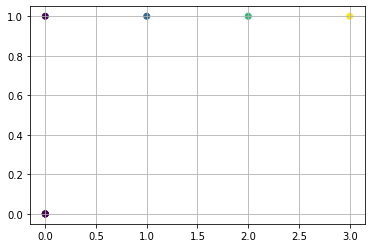

[[[-0.9502310579261237, 0.3837254388152356, 0.8294394269012506, 0.49085628689553773, 0, 0, 0], [0.306094110026635, -0.6779389503821465, -0.9716375107905479, 0.7057745151699608, 1, 1, 1], [-0.24622722749818382, -0.09249127426660908, -0.2713501271513812, -0.05026864777051898, 2, 2, 2], [-0.7718420742936525, -0.042466851292776164, -0.9931858130782771, -0.05224077924546289, 3, 3, 3]], [[0.04443319930360956, -0.734977449892841, 0.3346282420127167, 0.7794637458244187, 4, 4, 4], [0.34631625534569443, 0.21789144199742405, 0.7491355140860092, 0.544504569240827, 5, 5, 5], [-0.48680374750906585, -0.7440822049949958, -0.24516459634683696, -0.33144305615297154, 6, 6, 6], [-0.5206395221825793, 0.4858015813779901, -0.9703020984453814, -0.19326372163755523, 7, 7, 7]], [[0.1671207236234089, 0.47343845102632387, 0.1656595025199934, -0.7823244273247818, 8, 8, 8], [0.1781972431881631, -0.48622744999719303, 0.12884826684626827, -0.4211383451694106, 9, 9, 9], [0.5980718776122613, 0.3561106357130144, 0.39714

In [64]:
from utils import get_winner_neuron, get_active_neurons, update_weights

import matplotlib.pyplot as plt

epochs = 100
data_count = len(df_stand.index)
max_t = epochs * data_count
t = 0
print(w)

#plotting stuff that is probably wrong
points = weights = [[(i, j) for i in range(k)] for j in range(k)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda y: x[1], points))
plt.grid(True)

for e in range(epochs):
    for p in range(data_count):
        t += 1

        x_p = df_stand.iloc[[p]][["Area", "GDP", "Inflation", "Life.expect", "Military", "Pop.growth", "Unemployment"]].to_numpy()

        closest_info = get_winner_neuron(w, x_p, k)
        #print(closest_info, w[0][0])

        #neuronas activadas
        N_k = get_active_neurons(w, k, closest_info['x'], closest_info['y'], radius)

        #actualizar pesos
        w = update_weights(w, k, x_p, N_k, learning_rate)

        #update radius and learning_rate
        radius = np.floor((max_t - t*1.2) * radius/max_t) + 1
        learning_rate = 1 / t

#plt update how do i even do this help me
plt.scatter(x, y, c=x)
plt.pause(0.05)

print(w)